# APIs

There is quite a  **new topics** that we will cover here:
[Application Programming Interfaces (APIs)]

We are going to work through three very different examples _from scratch_ using the examples in their documentation in order to showcase the different flavors of APIs and the thought process of working through them.

Take-away messages:
* Googling the data you'd like + API will likely yield results (if the API exists).
* APIs come in different shapes and sizes:
    * Some contain just the json data (e.g. RKI API)
    * Some take parameters that help you customize the data you get out (e.g. VBB API)
    * Some have dedicated libraries (e.g. twitter API / tweepy)

### 1. API example

#### 1.1 RKI API

[Documentation](https://api.corona-zahlen.org/docs/#%E2%98%95%EF%B8%8F-donation)

Task: I would like to have the data for COVID incidence numbers in Germany.

In [36]:
import requests
import pandas as pd

In [37]:
url = 'https://api.corona-zahlen.org/germany/history/incidence'

Basic get command from requests (same as week04)

In [38]:
response = requests.get(url)

In [39]:
type(response.text)

str

In [40]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Instead of translating the response to text, we translate to JSON


In [41]:
response.json()

{'data': [{'weekIncidence': 0.0012013870157263002,
   'date': '2020-01-07T00:00:00.000Z'},
  {'weekIncidence': 0.0012013870157263002, 'date': '2020-01-08T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-09T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-10T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-11T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-12T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-13T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-14T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-15T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-16T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-17T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-18T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-19T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-20T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-21T00:00:00.000Z'},
  {'weekIncidence': 0, 'date': '2020-01-22T00:00:

In [43]:
rki_data = response.json()

In [44]:
rki_data.keys()

dict_keys(['data', 'meta'])

In [45]:
rki_data['data']

[{'weekIncidence': 0.0012013870157263002, 'date': '2020-01-07T00:00:00.000Z'},
 {'weekIncidence': 0.0012013870157263002, 'date': '2020-01-08T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-09T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-10T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-11T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-12T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-13T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-14T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-15T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-16T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-17T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-18T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-19T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-20T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-21T00:00:00.000Z'},
 {'weekIncidence': 0, 'date': '2020-01-22T00:00:00.000Z'},
 {'weekIncidence



Turn JSON file into DataFrame


In [46]:
rki_df = pd.DataFrame(rki_data['data'])
rki_df

,weekIncidence,date
0,0.001201,2020-01-07T00:00:00.000Z
1,0.001201,2020-01-08T00:00:00.000Z
2,0.000000,2020-01-09T00:00:00.000Z
3,0.000000,2020-01-10T00:00:00.000Z
4,0.000000,2020-01-11T00:00:00.000Z
...,...,...
1268,1.402019,2023-06-28T00:00:00.000Z
1269,1.291491,2023-06-29T00:00:00.000Z
1270,1.230220,2023-06-30T00:00:00.000Z
1271,1.207394,2023-07-01T00:00:00.000Z


In [47]:
rki_df.dtypes

weekIncidence    float64
date              object
dtype: object

Transform date column into DateTime (as in week03)

In [48]:
rki_df['date'] = pd.to_datetime(rki_df['date'])

In [49]:
rki_df.dtypes

weekIncidence                float64
date             datetime64[ns, UTC]
dtype: object

In [50]:
rki_df

,weekIncidence,date
0,0.001201,2020-01-07 00:00:00+00:00
1,0.001201,2020-01-08 00:00:00+00:00
2,0.000000,2020-01-09 00:00:00+00:00
3,0.000000,2020-01-10 00:00:00+00:00
4,0.000000,2020-01-11 00:00:00+00:00
...,...,...
1268,1.402019,2023-06-28 00:00:00+00:00
1269,1.291491,2023-06-29 00:00:00+00:00
1270,1.230220,2023-06-30 00:00:00+00:00
1271,1.207394,2023-07-01 00:00:00+00:00


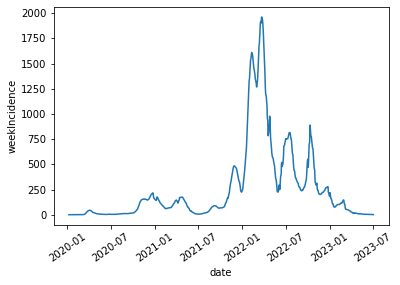

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt 

plot = sns.lineplot(data=rki_df, x='date', y='weekIncidence')
plt.xticks(rotation=35);

#### 1.2 VBB API

I would like to find a route from SPICED old campus to SPICED new campus (using the example in the VBB API documentation).

[Documentation](https://v6.vbb.transport.rest/api.html)

#### search for stops

In [52]:
url_new = 'https://v6.vbb.transport.rest/locations?poi=false&addresses=false&query=moritzplatz'

In [53]:
response_new = requests.get(url_new)

In [54]:
response_new.json()

[{'type': 'stop',
  'id': '900013101',
  'name': 'U Moritzplatz (Berlin)',
  'location': {'type': 'location',
   'id': '900013101',
   'latitude': 52.503737,
   'longitude': 13.410944},
  'products': {'suburban': False,
   'subway': True,
   'tram': False,
   'bus': True,
   'ferry': False,
   'express': False,
   'regional': False},
  'stationDHID': 'de:11000:900013101'},
 {'type': 'stop',
  'id': '900057107',
  'name': 'Dennewitzplatz (Berlin)',
  'location': {'type': 'location',
   'id': '900057107',
   'latitude': 52.495907,
   'longitude': 13.366223},
  'products': {'suburban': False,
   'subway': False,
   'tram': False,
   'bus': True,
   'ferry': False,
   'express': False,
   'regional': False},
  'stationDHID': 'de:11000:900057107'},
 {'type': 'stop',
  'id': '900215724',
  'name': 'Pritzwalk, Bürgerplatz',
  'location': {'type': 'location',
   'id': '900215724',
   'latitude': 53.153171,
   'longitude': 12.172922},
  'products': {'suburban': False,
   'subway': False,
   'tr

In [55]:
type(response_new.json())

list

In [56]:
len(response_new.json())

10

In [58]:
response_new.json()[0]['id']

'900013101'

In [59]:
pd.DataFrame(response_new.json())

,type,id,name,location,products,stationDHID
0,stop,900013101,U Moritzplatz (Berlin),"{'type': 'location', 'id': '900013101', 'latit...","{'suburban': False, 'subway': True, 'tram': Fa...",de:11000:900013101
1,stop,900057107,Dennewitzplatz (Berlin),"{'type': 'location', 'id': '900057107', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:11000:900057107
2,stop,900215724,"Pritzwalk, Bürgerplatz","{'type': 'location', 'id': '900215724', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:12070:900215724
3,stop,900210681,"Dallgow-Döberitz, Am Reitplatz","{'type': 'location', 'id': '900210681', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:12063:900210681
4,stop,900210648,"Dallgow-Döberitz, Goetheplatz","{'type': 'location', 'id': '900210648', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:12063:900210648
5,stop,900210705,"Dallgow-Döberitz, Lindhorstplatz","{'type': 'location', 'id': '900210705', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:12063:210705
6,stop,900550053,"Ostritz, Bahnhofsvorplatz","{'type': 'location', 'id': '900550053', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",NaN
7,stop,900055101,U Viktoria-Luise-Platz (Berlin),"{'type': 'location', 'id': '900055101', 'latit...","{'suburban': False, 'subway': True, 'tram': Fa...",de:11000:900055101
8,stop,900029202,Moritzstr. (Berlin),"{'type': 'location', 'id': '900029202', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:11000:900029202
9,stop,900310807,"Fürstenwalde, Platz der Solidarität","{'type': 'location', 'id': '900310807', 'latit...","{'suburban': False, 'subway': False, 'tram': F...",de:12067:900310807


#### get departures

In [60]:
"""
Berlin public transport API
"""

import requests

BASE_URL = 'https://v6.vbb.transport.rest'

# find a station
name = 'moritzplatz'
url = f"{BASE_URL}/locations?query={name}"
station_id = requests.get(url).json()[0]['id']

# look up departures
print(f'\nNext connections from U {name.capitalize()}:\n')

url = f'{BASE_URL}/stops/{station_id}/departures?duration={10}'

j = requests.get(url).json()


j.keys()


Next connections from U Moritzplatz:



dict_keys(['departures', 'realtimeDataUpdatedAt'])

In [61]:
info=j['departures']
info

[{'tripId': '1|32123|0|86|3072023',
  'stop': {'type': 'stop',
   'id': '900013101',
   'name': 'U Moritzplatz (Berlin)',
   'location': {'type': 'location',
    'id': '900013101',
    'latitude': 52.503737,
    'longitude': 13.410944},
   'products': {'suburban': False,
    'subway': True,
    'tram': False,
    'bus': True,
    'ferry': False,
    'express': False,
    'regional': False},
   'stationDHID': 'de:11000:900013101'},
  'when': '2023-07-03T14:27:00+02:00',
  'plannedWhen': '2023-07-03T14:28:00+02:00',
  'delay': -60,
  'platform': None,
  'plannedPlatform': None,
  'prognosisType': 'prognosed',
  'direction': 'U Hermannplatz',
  'provenance': None,
  'line': {'type': 'line',
   'id': 'm29',
   'fahrtNr': '43978',
   'name': 'M29',
   'public': True,
   'adminCode': 'BVB---',
   'productName': 'Bus',
   'mode': 'bus',
   'product': 'bus',
   'operator': {'type': 'operator',
    'id': 'berliner-verkehrsbetriebe',
    'name': 'Berliner Verkehrsbetriebe'}},
  'remarks': [{'typ

In [62]:
pd.DataFrame(info)

,tripId,stop,when,plannedWhen,delay,platform,plannedPlatform,prognosisType,direction,provenance,line,remarks,origin,destination,currentTripPosition
0,1|32123|0|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:27:00+02:00,2023-07-03T14:28:00+02:00,-60,None,None,prognosed,U Hermannplatz,None,"{'type': 'line', 'id': 'm29', 'fahrtNr': '4397...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900078104', 'name': 'U...","{'type': 'location', 'latitude': 52.50344, 'lo..."
1,1|32181|1|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:28:00+02:00,2023-07-03T14:27:00+02:00,60,None,None,prognosed,"Grunewald, Roseneck",None,"{'type': 'line', 'id': 'm29', 'fahrtNr': '4403...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900048109', 'name': 'R...","{'type': 'location', 'latitude': 52.503925, 'l..."
2,1|46522|11|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:28:00+02:00,2023-07-03T14:28:00+02:00,0,2,2,prognosed,Wittenau,None,"{'type': 'line', 'id': 'u8', 'fahrtNr': '21627...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900096197', 'name': 'S...","{'type': 'location', 'latitude': 52.503044, 'l..."
3,1|46466|6|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:29:00+02:00,2023-07-03T14:28:00+02:00,60,1,1,prognosed,Hermannstraße,None,"{'type': 'line', 'id': 'u8', 'fahrtNr': '21974...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900079221', 'name': 'S...","{'type': 'location', 'latitude': 52.508051, 'l..."
4,1|32064|0|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:29:00+02:00,2023-07-03T14:33:00+02:00,-240,None,None,prognosed,U Hermannplatz,None,"{'type': 'line', 'id': 'm29', 'fahrtNr': '4391...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900078104', 'name': 'U...","{'type': 'location', 'latitude': 52.505337, 'l..."
5,1|32253|1|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:30:00+02:00,2023-07-03T14:32:00+02:00,-120,None,None,prognosed,U Wittenbergplatz,None,"{'type': 'line', 'id': 'm29', 'fahrtNr': '4411...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900056101', 'name': 'U...","{'type': 'location', 'latitude': 52.50246, 'lo..."
6,1|46460|14|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:33:00+02:00,2023-07-03T14:33:00+02:00,0,1,1,prognosed,Hermannstraße,None,"{'type': 'line', 'id': 'u8', 'fahrtNr': '21975...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900079221', 'name': 'S...","{'type': 'location', 'latitude': 52.520978, 'l..."
7,1|46518|47|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:33:00+02:00,2023-07-03T14:33:00+02:00,0,2,2,prognosed,Wittenau,None,"{'type': 'line', 'id': 'u8', 'fahrtNr': '21628...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900096197', 'name': 'S...","{'type': 'location', 'latitude': 52.488707, 'l..."
8,1|32181|2|86|3072023,"{'type': 'stop', 'id': '900013101', 'name': 'U...",2023-07-03T14:40:00+02:00,2023-07-03T14:37:00+02:00,180,None,None,prognosed,"Grunewald, Roseneck",None,"{'type': 'line', 'id': 'm29', 'fahrtNr': '4403...","[{'type': 'hint', 'code': 'OPERATOR', 'text': ...",None,"{'type': 'stop', 'id': '900048109', 'name': 'R...","{'type': 'location', 'latitude': 52.491466, 'l..."


In [63]:
vbb_berlin=pd.DataFrame(info)
vbb_berlin.dtypes

tripId                 object
stop                   object
when                   object
plannedWhen            object
delay                   int64
platform               object
plannedPlatform        object
prognosisType          object
direction              object
provenance             object
line                   object
remarks                object
origin                 object
destination            object
currentTripPosition    object
dtype: object

In [64]:
for e in info:
    print(e['plannedWhen'][11:-9], '  ', e['line']['name'], e['direction'])

14:28    M29 U Hermannplatz
14:27    M29 Grunewald, Roseneck
14:28    U8 Wittenau
14:28    U8 Hermannstraße
14:33    M29 U Hermannplatz
14:32    M29 U Wittenbergplatz
14:33    U8 Hermannstraße
14:33    U8 Wittenau
14:37    M29 Grunewald, Roseneck


In [ ]:
url

### 2. What makes a web API better than scraping? 

- Interface is not meant for humans but for machines. This refers both, to  
    - requests (=> well defined way how to ask for information)
    - and to data delivery (=> provides data in a **more machine-readable format**, mostly json) 
- For larger data providers (e.g. reddit) there are often  
    - helper libraries  
    - documentation and examples
    - clear terms and conditions about what is allowed
- From the point of view of the provider, APIs
    - create visibility (e.g. for a hotel operator whose vacant rooms are to be found by a meta search engine)
    - ...

### 3. How to *find* an interesting (web) API?

(Please have a look (!) and feel free to use your desired one for this week's project.)  
- just search the internet  
- have a look [here](https://apislist.com/)
- or [here](https://pypi.org)
- But usually you want to start the other way round:  
 You know which data you want to scrape and specifically look for whether an API exists for this [data](https://spiced.space/bergamot-encoder/ds-course/chapters/final_project/datasets.html#datasets).  

### 4. Some remarks

By default, we will use the reddit API to fetch 'reddits' this week.<br><br>


Reddit uses open authorization (OAuth) to check the permission. Have a look at the token dancing [here](https://www.youtube.com/watch?v=SXDce0e3Ue4) (6 min).<br><br>